In [21]:
import skimage
from skimage.color import rgb2gray
import numpy as np
import math
import matplotlib.pyplot as plt
from skimage.util import random_noise

In [9]:
img_astronauta_ori = skimage.data.astronaut()
img_astronauta_bn = rgb2gray(img_astronauta_ori)

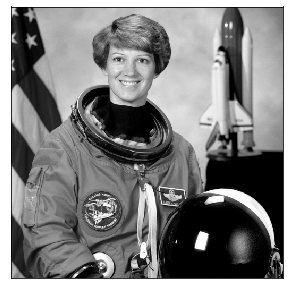

In [13]:
def mostrar_imagen(imagen):
    fig,ax=plt.subplots(figsize=[5,5])
    ax.imshow(imagen,cmap=plt.cm.gray)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()
mostrar_imagen(img_astronauta_bn)

In [17]:
def generar_img_convolucion(imagen,mat_kernel):    
    (nfilas_imagen,ncol_imagen)=imagen.shape
    (nfilas_kernel,ncol_kernel)=mat_kernel.shape
    if nfilas_kernel>nfilas_imagen:
        raise ValueError("La matriz kernel no pueden ser mayor a la imagen.")
    if ncol_kernel>ncol_imagen:
        raise ValueError("La matriz kernel no pueden ser mayor a la imagen.")        
    dimesion_fila=int(nfilas_kernel/2)
    dimesion_columna=int(ncol_kernel/2)
    img_ceros=agrear_dimensiones_ceros(imagen,dimesion_fila,dimesion_columna)
    img_convolucion = np.zeros((nfilas_imagen,ncol_imagen))     
    k=0      
    for i in range(dimesion_fila,nfilas_imagen+dimesion_fila):
        l=0
        for j in range(dimesion_columna,ncol_imagen+dimesion_columna):
            fila_min=i-dimesion_fila
            fila_max=i+dimesion_fila+1
            col_min=j-dimesion_columna
            col_max=j+dimesion_columna+1
            sub_mat_imagen = img_ceros[fila_min:fila_max,col_min:col_max]
            mat_resultado = mat_kernel.dot(sub_mat_imagen)
            suma = np.sum(mat_resultado)
            img_convolucion[k,l]=suma
            l=l+1
        k=k+1        
    return img_convolucion                
def agrear_dimensiones_ceros(imagen,dimesion_fila,dimesion_columna):    
    (nfilas,ncol)=imagen.shape 
    total_filas=nfilas+2*dimesion_fila
    total_columnas=ncol+2*dimesion_columna
    img_ceros = np.zeros((total_filas,total_columnas))
    f_min=dimesion_fila
    f_max=nfilas+dimesion_fila
    col_min=dimesion_columna
    col_max=ncol+dimesion_columna
    img_ceros[f_min:f_max,col_min:col_max] = imagen[0:nfilas,0:ncol]
    return img_ceros

In [18]:
def generar_img_kernel(imagen,mat_kernel):
    return generar_img_convolucion(imagen,mat_kernel_horizontal)

Filtro pasa bajo
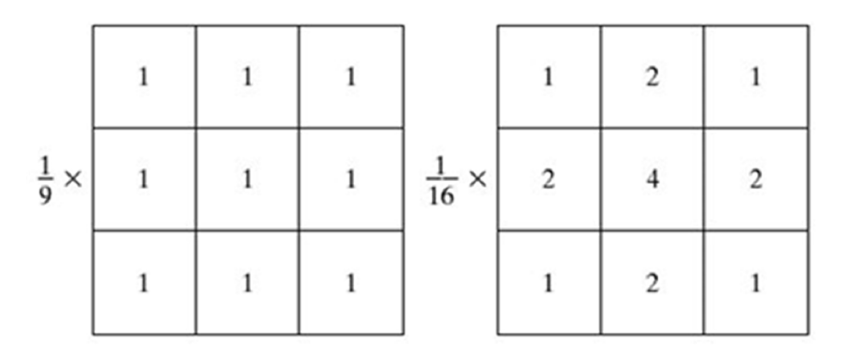

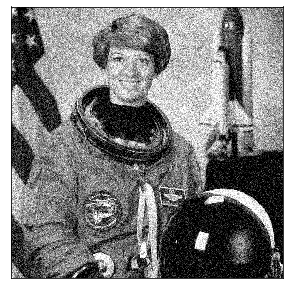

In [23]:
sigma = 0.155
img_noisy = random_noise(img_astronauta_bn, var=sigma**2)
mostrar_imagen(img_noisy)

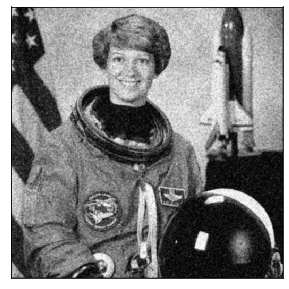

In [24]:
mat_kernel = np.array([[1/9, 1/9, 1/9], [1/9,1/9, 1/9],[1/9, 1/9, 1/9]])
img_conv = generar_img_convolucion(img_noisy,mat_kernel)
mostrar_imagen(img_conv)

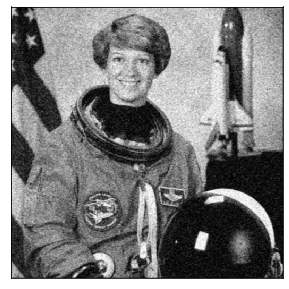

In [25]:
mat_kernel = np.array([[1/16, 2/16, 1/16], [2/16,4/16, 2/16],[1/16, 2/16, 1/16]])
img_conv = generar_img_convolucion(img_noisy,mat_kernel)
mostrar_imagen(img_conv)

Filtro paso alto

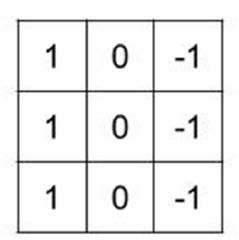

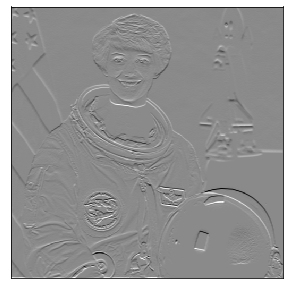

In [26]:
mat_kernel = np.array([[1, 0, -1], [1,0, -1],[1, 0, -1]])
img_conv = generar_img_convolucion(img_astronauta_bn,mat_kernel)
mostrar_imagen(img_conv)

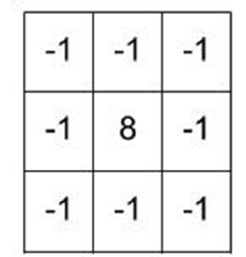

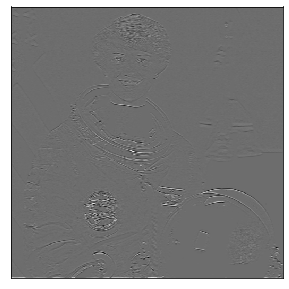

In [27]:
mat_kernel = np.array([[-1, -1, -1], [-1, 8, -1],[-1, -1, -1]])
img_conv = generar_img_convolucion(img_astronauta_bn,mat_kernel)
mostrar_imagen(img_conv)